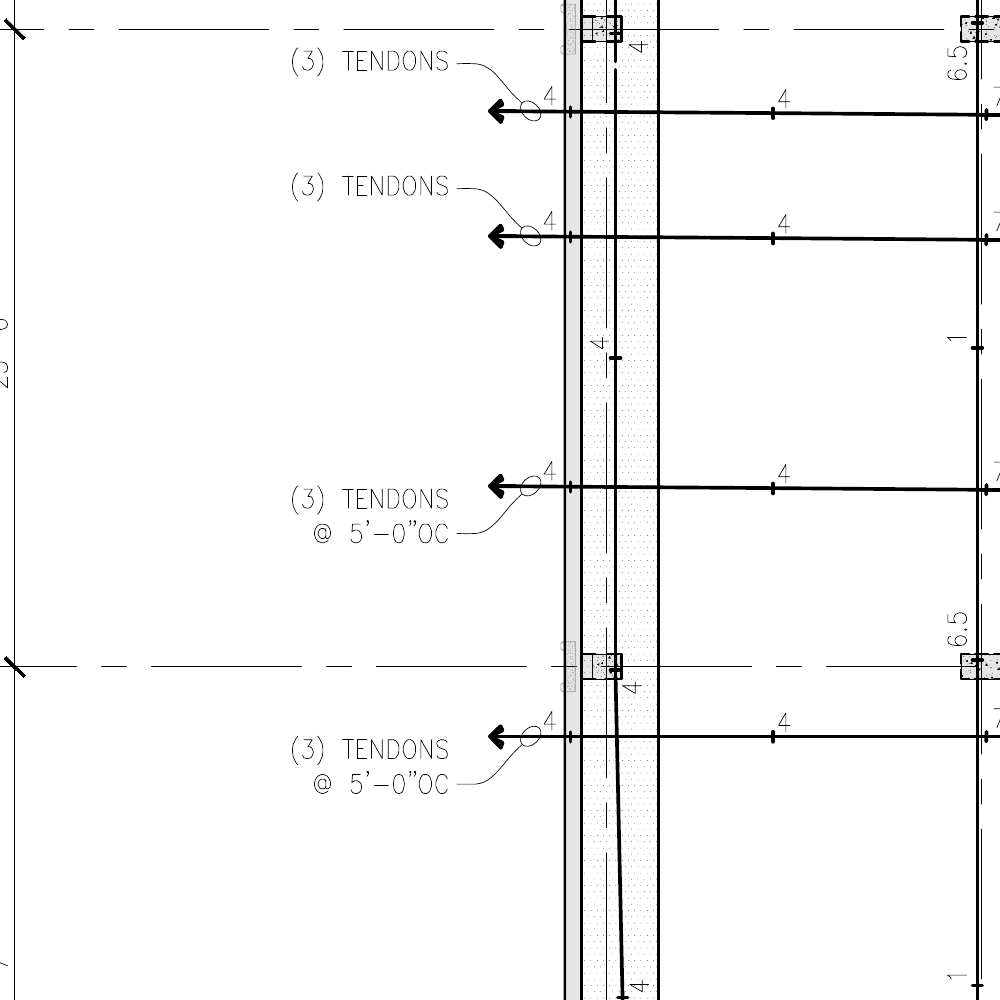

In [1]:
from PIL import Image
import cv2

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/original.png")
height, width = img.shape[:2]

tile = img[2000:3000, 2000:3000].copy()
Image.fromarray(tile)

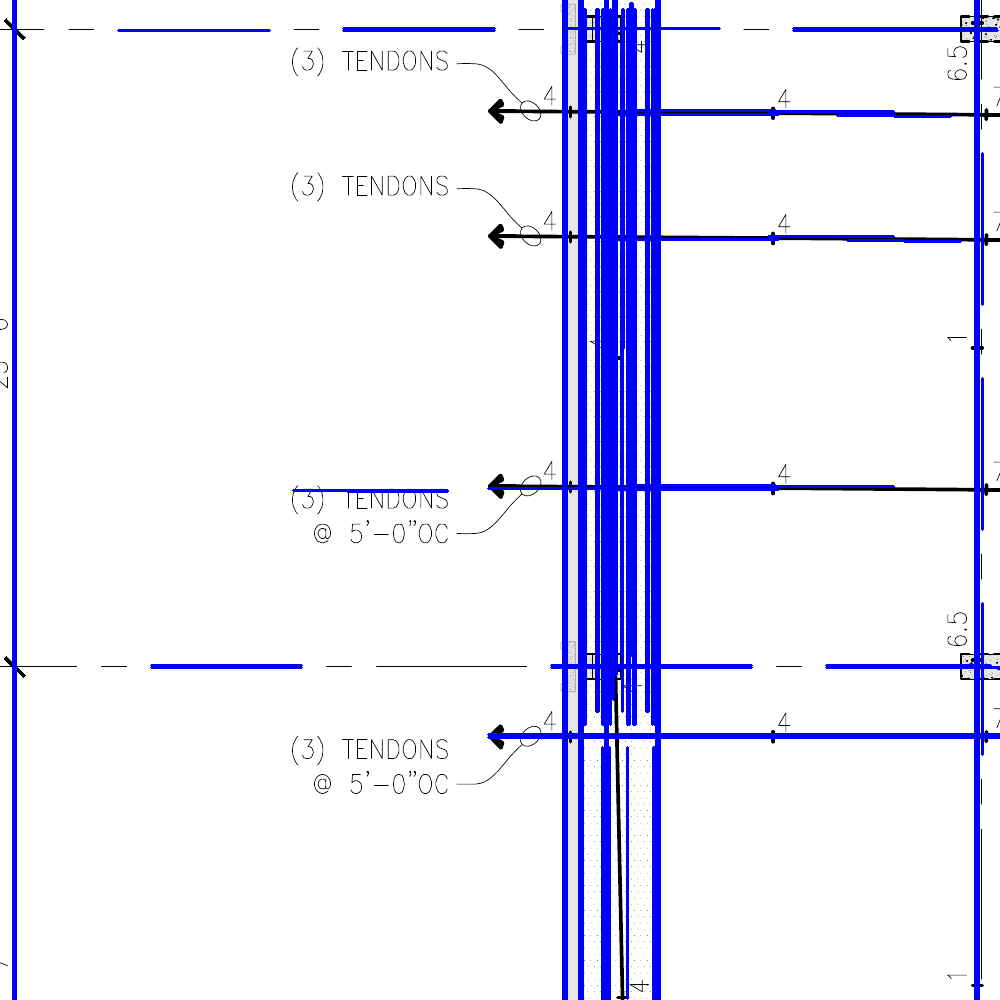

In [2]:
import numpy as np

gray = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi / 180,
    threshold=120,
    minLineLength=100,
    maxLineGap=20
)

results = []
image_copy = tile.copy()
if lines is not None:
    for l in lines:
        x1, y1, x2, y2 = l[0]

        # keep horizontal or vertical
        if abs(x1 - x2) < 10 or abs(y1 - y2) < 10:
            results.append((x1, y1, x2, y2))
            cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)

Image.fromarray(image_copy)

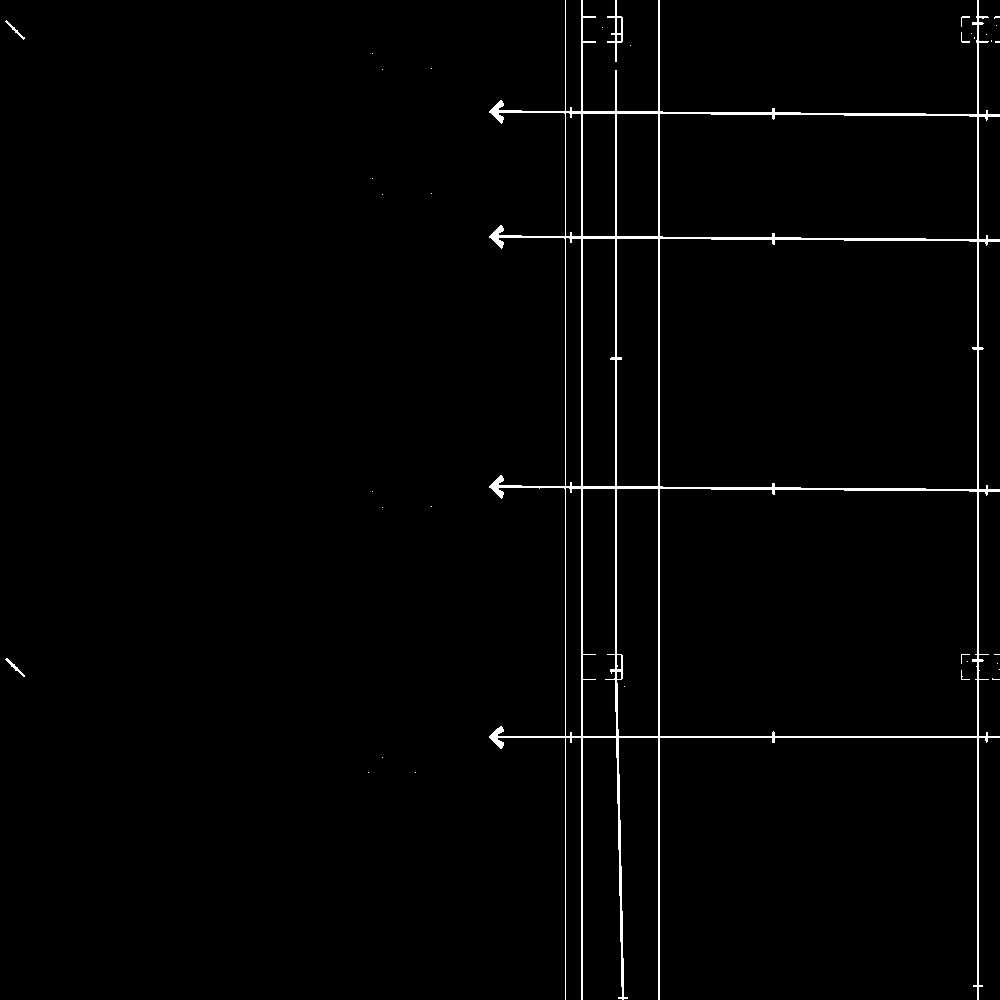

In [10]:
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((2, 2), np.uint8)
erode = cv2.erode(thresh, kernel)
Image.fromarray(erode)